In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import pywt 
import scipy

Wavelets and filterbanks

1 Implementation of a two-ways filterbank

Q1

In [2]:
def cqf_analysis_filterbank(x, h0):
    #input parameters are the low-pass analysis filter impulse response h0 and the signal to be processed x
    #output is the set of approximation u0 and details u1 coefficients
    
    #Compute h1:  
    n = np.size(h0)
    h1 = np.zeros(n)
    for j in range (n):
        h1[j] = ((-1)**j)*h0[n-1-j]
    
    #Zero-padding
    x_padding = np.concatenate([np.zeros(n),x,np.zeros(n)])
    
    #filter by h0 and h1
    x0 = sig.lfilter(h0,np.array([1]),x_padding)
    x1 = sig.lfilter(h1,np.array([1]),x_padding)
    
    #Compute v0 and v1
    v0 = []
    v1 = []
    nx = len(x0)//2
    for i in range(nx):
        v0.append(x0[2*i])
        v1.append(x1[2*i])
    v0 = np.array(v0)
    v1 = np.array(v1)
    
    #Compute u0 and u1
    u0 = []
    u1 = []
    nv = len(v0)
    for i in range(nv):
        u0 += [v0[i],0]
        u1 += [v1[i],0]
    
    return (u0, u1)

Q2 Implement the synthesis filterbank

In [3]:

def cqf_synthesis_filterbank(u0, u1, h0):
        
    #Compute f0
    n=np.size(h0)
    f0=np.zeros(n)
    for i in range(n):
        f0[i]=h0[n-1-i]
    
    #Compute f1
    f1=np.zeros(n)
    for i in range(n):
        f1[i]=h0[i]*((-1)**(i-1))
        
    #Compute y0 and y1
    y0 = np.convolve(u0,f0)
    y1 = np.convolve(u1,f1)
    y = y0 + y1
    return y


        


Q3

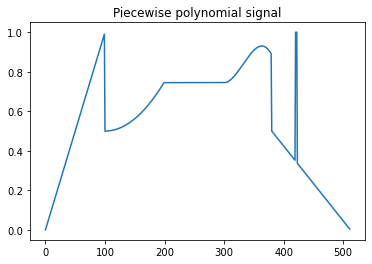

In [4]:
x=np.zeros(512) 
N1 = 100
N2 = 200
N3 = 300
N4 = 380
N5 = 512
r1 = np.arange(0,N1)
r2 = np.arange(N1,N2)
r3 = np.arange(N2,N3)
r4 = np.arange(N3,N4)
r5 = np.arange(N4,N5)
x[r1] = r1/float(N1)
x[r2] =0.5+ ((r2-float(N1))/float(N2))**2
x[r3] = x[N2-1]
t4 = (r4-float(N3))/float(N4)
x[r4] = -80*t4**3 + 20*t4**2 + x[N2-1]
x[r5] = 0.5*(1-(r5-float(N4))/(float(N5-N4))) 
x[420:423] =1
plt.plot(x)
plt.title("Piecewise polynomial signal")
plt.show()

520


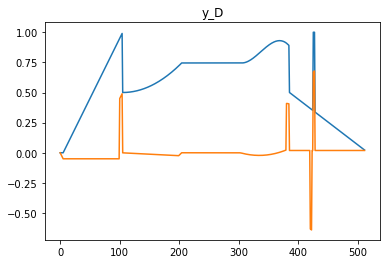

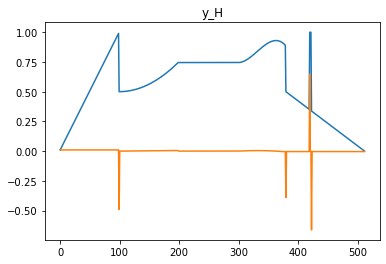

In [5]:
#Creating the Haar filter and the Daubechies-4 filter
h_Haar = np.array([0.707106781187,0.707106781187])

h_Daubechies_4 = np.array([0.482962913145, 0.836516303738, 0.224143868042, -0.129409522551])

#Compute u0_H, u1_H, u0_D, u1_D


(u0_H,u1_H) = cqf_analysis_filterbank(x, h_Haar)
(u0_D,u1_D) = cqf_analysis_filterbank(x, h_Daubechies_4)
print(len(u0_D))

#Compute y_H, y_D
y_H = cqf_synthesis_filterbank(u0_H, u1_H, h_Haar)
y_D = cqf_synthesis_filterbank(u0_D, u1_D, h_Daubechies_4)


#Plot
plt.plot(y_D[2:514], label="y_D")
plt.plot(y_D[2:514]-x, label = "Difference Daubechies 4")
plt.title("y_D")
plt.show()
plt.plot(y_H[4:516])
plt.title("y_H")
plt.plot(y_H[4:516]-x, label = "Difference Haar")
plt.show()

The reconstruction is almost perfect, with only problems at the abrupt changes of x. The reconstruction is better for the Daubechies-4 filter than for the Haar filter, which has one extra vanishing moment.


Q5

In [6]:
print('There are', x.shape[0], 'coefficients in x.')
print('There are',2*len(h_Haar)-2, 'more in the Haar filter and',2*len(h_Daubechies_4)-2,'more in the Daubechies-4.' )

There are 512 coefficients in x.
There are 2 more in the Haar filter and 6 more in the Daubechies-4.


Q6

In [7]:
def cqf_analysis_filterbank_periodic(x, h0):
    #input parameters are the low-pass analysis filter impulse response h0 and the signal to be processed x
    #output is the set of approximation u0 and details u1 coefficients
    
    #Compute h1:  
    n = np.size(h0)
    h1 = np.zeros(n)
    for j in range (n):
        h1[j] = ((-1)**j)*h0[n-1-j]
    
    #Periodization
    x_periodic = np.concatenate([x,x,x])
    
    #filter by h0 and h1
    x0 = sig.lfilter(h0,np.array([1]),x_periodic)
    x1 = sig.lfilter(h1,np.array([1]),x_periodic)
    
    #Compute v0 and v1
    v0 = []
    v1 = []
    nx = len(x0)//2
    for i in range(nx):
        v0.append(x0[2*i])
        v1.append(x1[2*i])
    v0 = np.array(v0)
    v1 = np.array(v1)
    
    #iCompute u0 and u1
    u0 = []
    u1 = []
    nv = len(v0)
    for i in range(nv):
        u0 += [v0[i],0]
        u1 += [v1[i],0]
    
    return (u0, u1)

                     

In [8]:
def cqf_synthesis_filterbank_periodic(u0, u1, h0):
    
    #Periodization
    u0_periodic=np.concatenate([u0,u0,u0])
    u1_periodic=np.concatenate([u1,u1,u1])
        
    #Compute f0
    n=np.size(h0)
    f0=np.zeros(n)
    for i in range(n):
        f0[i]=h0[n-1-i]
    
    #Compute f1
    f1=np.zeros(n)
    for i in range(n):
        f1[i]=h0[i]*((-1)**(i-1))
        
    #Compute y0 and y1
    y0 = np.convolve(u0_periodic,f0)
    y1 = np.convolve(u1_periodic,f1)
    y = y0 + y1
    return y


1536


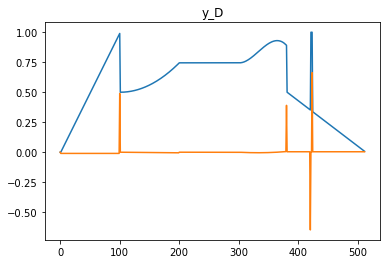

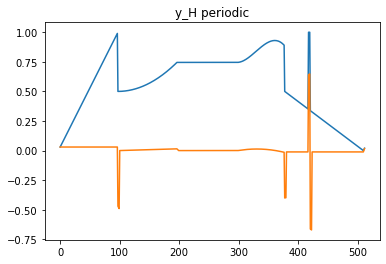

In [9]:
(u0_H,u1_H) = cqf_analysis_filterbank_periodic(x, h_Haar)
(u0_D,u1_D) = cqf_analysis_filterbank_periodic(x, h_Daubechies_4)
print(len(u0_D))

#Compute y_H, y_D
y_H = cqf_synthesis_filterbank_periodic(u0_H, u1_H, h_Haar)
y_D = cqf_synthesis_filterbank_periodic(u0_D, u1_D, h_Daubechies_4)


#Plot
plt.plot(y_D[2:514], label="y_D periodic")
plt.plot(y_D[2:514]-x, label = "Difference Daubechies 4")
plt.title("y_D")
plt.show()
plt.plot(y_H[4:516])
plt.title("y_H periodic")
plt.plot(y_H[4:516]-x, label = "Difference Haar")
plt.show()

Q7

In [23]:
def MRA(x, h0, nLev,tab=[]):
    n=len(h0)
    f0=np.zeros(n)
    for i in range(n):
        f0[i]=h0[n-1-i]
    u0, u1 = cqf_analysis_filterbank_periodic(x, h0)
    
    tab=[]
    if (nLev==1):
        tab.append(u1)
        tab.reverse()
        tab.append(u0)
        tab.reverse()
    
    else:
        tab.append(u1)
        y0=np.convolve(u0,f0)[:len(x)] 
        MRA(y0,u0,nLev-1,tab)
    

    results = np.zeros([len(tab),len(x)])
    
    for i in range(len(tab)):
        results[i] = tab[i][:len(x)]
    
    return results

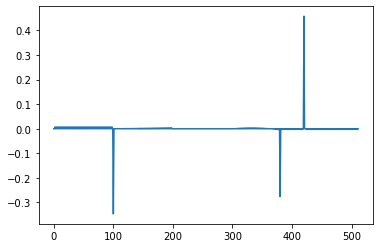

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 432x288 with 0 Axes>

In [28]:
coeffs = np.array((MRA1(x ,h_Haar ,10,[])))
for i in range(10):
    plt.plot(coeffs[i])
    plt.show()
    plt.clf()

In [27]:
def MRA1(x, h0, nLev, tableau = []):
    
    N = len(h0)
    
    f0 = [h0[N-1-n] for n in range(N)]
    u0, u1 = cqf_analysis_filterbank_periodic(x, h0)
    
  #A FAIRE

Q9 et Q10

In [30]:
# Low pass
lo_db1 = pywt.Wavelet('db1').dec_lo
lo_db2 = pywt.Wavelet('db2').dec_lo
lo_db3 = pywt.Wavelet('db3').dec_lo
lo_db4 = pywt.Wavelet('db4').dec_lo

# High pass
hi_db1 = pywt.Wavelet('db1').dec_hi
hi_db2 = pywt.Wavelet('db2').dec_hi
hi_db3 = pywt.Wavelet('db3').dec_hi
hi_db4 = pywt.Wavelet('db4').dec_hi

Text(0.5, 1.0, 'High pass filters')

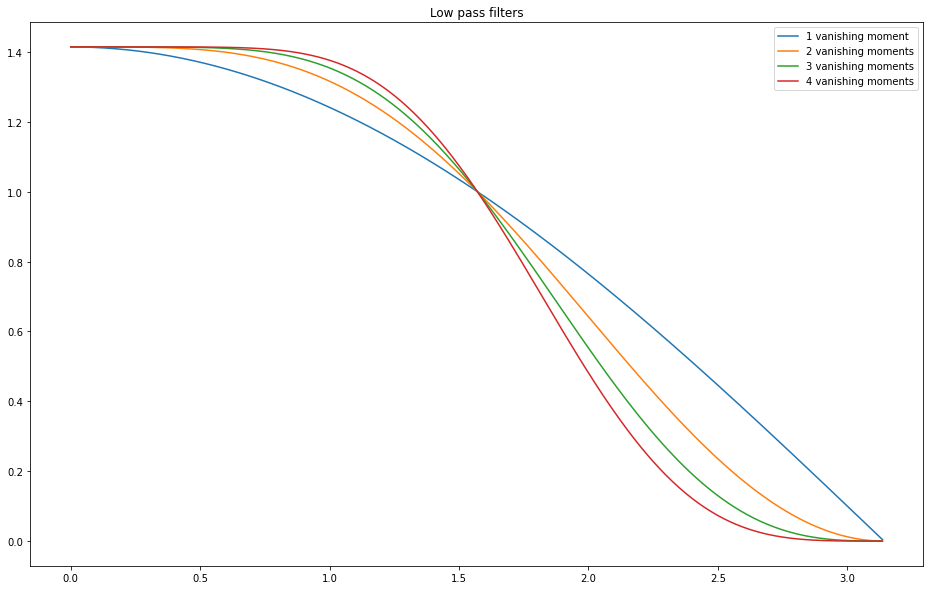

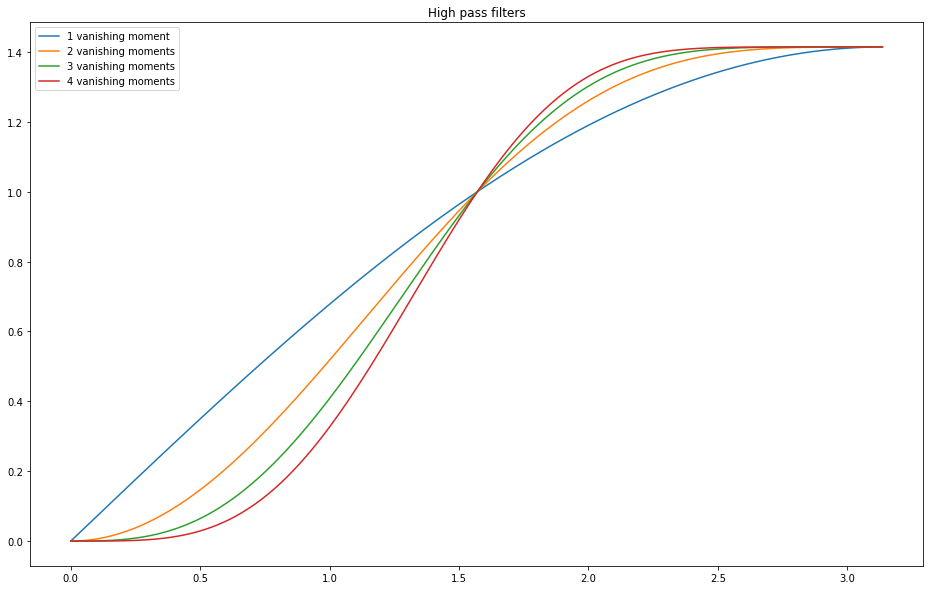

In [40]:

plt.figure(figsize=(16,10))
w1,h1 = sig.freqz(lo_db1)
plt.plot(w1,np.abs(h1),label = '1 vanishing moment')
w2,h2 = sig.freqz(lo_db2)
plt.plot(w2,np.abs(h2),label = '2 vanishing moments')
w3,h3 = sig.freqz(lo_db3)
plt.plot(w3,np.abs(h3),label = '3 vanishing moments')
w4,h4 = sig.freqz(lo_db4)
plt.plot(w4,np.abs(h4),label = '4 vanishing moments')
plt.legend()
plt.title("Low pass filters")

plt.figure(figsize=(16,10))
w1,h1 = sig.freqz(hi_db1)
plt.plot(w1,np.abs(h1),label = '1 vanishing moment')
w2,h2 = sig.freqz(hi_db2)
plt.plot(w2,np.abs(h2),label = '2 vanishing moments')
w3,h3 = sig.freqz(hi_db3)
plt.plot(w3,np.abs(h3),label = '3 vanishing moments')
w4,h4 = sig.freqz(hi_db4)
plt.plot(w4,np.abs(h4),label = '4 vanishing moments')
plt.legend()
plt.title("High pass filters")

We can see that with more vanishing moments, we get closer to an ideal low pass (or high pass) filter.